In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('fraud_detection_bank_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


In [4]:
data.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [5]:
data.shape

(20468, 114)

In [6]:
data.describe()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,10233.500000,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,5908.746991,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5116.750000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,10233.500000,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,15350.250000,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,20467.000000,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


In [7]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [8]:
data.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9',
       ...
       'col_103', 'col_104', 'col_105', 'col_106', 'col_107', 'col_108',
       'col_109', 'col_110', 'col_111', 'targets'],
      dtype='object', length=113)

In [9]:
data.isnull().sum()

col_0      0
col_1      0
col_2      0
col_3      0
col_4      0
          ..
col_108    0
col_109    0
col_110    0
col_111    0
targets    0
Length: 113, dtype: int64

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\shweta chouhan\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


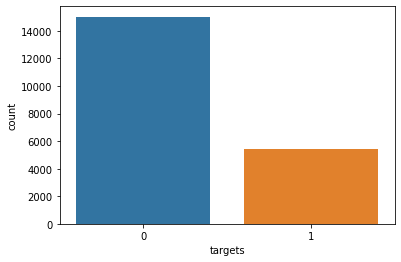

In [11]:
sns.countplot(data['targets'])
plt.show()

In [12]:
data['targets'].value_counts(normalize = True)

0    0.734317
1    0.265683
Name: targets, dtype: float64

In [13]:
corr = data.corr()

In [14]:
corr

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
col_0,1.000000,0.551274,0.005679,0.077408,-0.002019,0.037343,0.011153,1.000000,NaN,NaN,...,0.009964,-0.009675,0.003354,0.075413,0.078262,0.000603,0.011074,0.015806,0.052114,-0.041022
col_1,0.551274,1.000000,0.301637,0.280233,0.102733,0.246112,0.008418,0.551274,NaN,NaN,...,0.077884,0.021930,0.031179,0.232897,0.290501,-0.001469,0.088685,0.111713,0.206308,-0.109658
col_2,0.005679,0.301637,1.000000,0.018034,0.068560,-0.009578,0.001042,0.005679,NaN,NaN,...,0.024692,0.001027,0.009001,0.041971,0.054846,0.005294,0.029326,0.009831,0.033094,-0.026381
col_3,0.077408,0.280233,0.018034,1.000000,-0.012554,-0.015184,-0.044345,0.077408,NaN,NaN,...,0.091980,-0.038370,0.046253,0.148617,0.199203,-0.001617,0.070381,0.049871,0.127431,-0.095612
col_4,-0.002019,0.102733,0.068560,-0.012554,1.000000,0.040922,0.014800,-0.002019,NaN,NaN,...,0.019427,0.025733,-0.000212,0.059956,0.077622,-0.000695,0.051145,0.006374,0.056226,0.007819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_108,0.000603,-0.001469,0.005294,-0.001617,-0.000695,-0.001556,-0.000894,0.000603,NaN,NaN,...,-0.000469,-0.005221,-0.000346,0.010468,0.014398,1.000000,0.030680,-0.000556,0.013871,-0.004204
col_109,0.011074,0.088685,0.029326,0.070381,0.051145,0.124398,-0.003134,0.011074,NaN,NaN,...,0.082940,0.107412,0.061839,0.057408,0.114461,0.030680,1.000000,0.139361,0.369065,0.166826
col_110,0.015806,0.111713,0.009831,0.049871,0.006374,0.116577,-0.008749,0.015806,NaN,NaN,...,0.040426,0.003011,0.200445,0.061286,0.150089,-0.000556,0.139361,1.000000,0.334947,0.071049
col_111,0.052114,0.206308,0.033094,0.127431,0.056226,0.223831,0.021537,0.052114,NaN,NaN,...,0.136194,0.402607,0.124260,0.221531,0.329699,0.013871,0.369065,0.334947,1.000000,0.262442


In [15]:
#here there are multipe multicollinearity, NaN
duplicate = np.sum(corr>=0.8)
duplicate = duplicate[duplicate > 1]
duplicate = duplicate.reset_index()
duplicate = duplicate.sort_values(0)
duplicate.shape

(25, 2)

In [16]:
duplicate

,index,0
20,col_62,2
17,col_56,2
6,col_37,2
10,col_44,2
1,col_1,3
0,col_0,4
2,col_7,4
4,col_23,4
7,col_38,4
12,col_48,10


In [17]:
corr.fillna(-999, inplace = True)

In [18]:
null = np.sum(corr == -999)
null = null[null > 15]
null = null.reset_index()
null.shape

(15, 2)

In [19]:
null

,index,0
0,col_8,113
1,col_9,113
2,col_10,113
3,col_11,113
4,col_12,113
5,col_18,113
6,col_19,113
7,col_20,113
8,col_21,113
9,col_35,113


In [20]:
col_to_drop = null['index'].append(duplicate['index'].iloc[:-1])

In [21]:
data.drop(col_to_drop, axis=1, inplace=True)

In [22]:
data.head()

,col_2,col_3,col_4,col_5,col_6,col_13,col_14,col_15,col_16,col_17,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,18,0,1,7,0,1,0,1,0,...,0,0,0,1,1,0,0,0,49,1
1,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,55,1
2,0,4,0,3,6,0,1,1,0,0,...,0,0,0,1,1,0,0,0,56,1
3,0,1,0,0,8,0,0,0,1,0,...,0,1,0,1,1,0,0,0,65,1
4,0,2,0,1,7,0,1,0,1,0,...,0,0,0,1,1,0,0,0,175,1


In [23]:
data.shape

(20468, 74)

In [24]:
X, y = data.drop('targets', axis=1), data['targets']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [26]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
pca = PCA(n_components=17)
X = pca.fit_transform(X)

### Machine leanring

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [29]:
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

In [30]:
def result(name, y_pred):
    """Returns multiple classification metrics of a machine learning algorithm
    
    :params name: Machine learning algorithm name
    
    :params y_pred: Prediction results of a machine learning algorithm test set
    """
    print(f'Results of Machine Learning Modelling with {name} Algorithms\n')
    print('-' * 78)
    print(f'\nAccuracy Score :\n{accuracy_score(y_test, y_pred) * 100 } %\n')
    print(f'Confusion Matrix :\n{confusion_matrix(y_test, y_pred)}\n')
    conf = confusion_matrix(y_test, y_pred, normalize='all')
    print('Confusion Matrix with Normalized Value :')
    print('[[{:.3f}  {:.3f}]\n [{:.3f}  {:.3f}]]\n'.format(conf[0,0], conf[0,1], conf[1,0], conf[1,1]))
    print(f'Classification Report :\n{classification_report(y_test, y_pred)}\n')
    print(f'ROC AUC Score :\n{roc_auc_score(y_test, y_pred,)}\n')

#### Kneighbors Classifier

In [31]:
knn_params = {'n_neighbors':np.arange(2,50)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, refit=True, scoring='roc_auc')
knn_grid.fit(X_train, y_train)
knn_pred = knn_grid.predict(X_test)
result('KNN', knn_pred)

Results of Machine Learning Modelling with KNN Algorithms

------------------------------------------------------------------------------

Accuracy Score :
87.44504152418173 %

Confusion Matrix :
[[3946  563]
 [ 208 1424]]

Confusion Matrix with Normalized Value :
[[0.643  0.092]
 [0.034  0.232]]

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      4509
           1       0.72      0.87      0.79      1632

    accuracy                           0.87      6141
   macro avg       0.83      0.87      0.85      6141
weighted avg       0.89      0.87      0.88      6141


ROC AUC Score :
0.8738438156367004



#### Randome Forest Classifer

In [32]:
rfc_params = {'min_samples_split':[0.001, 0.0001],
             'n_estimators':[200, 300],
              'criterion':['entropy']
             }
rfc_grid = GridSearchCV(RandomForestClassifier(), rfc_params, scoring='roc_auc', cv=3, refit=True)
rfc_grid.fit(X_train, y_train)
rfc_pred = rfc_grid.predict(X_test)
result('Random Forest Classifier', rfc_pred)

Results of Machine Learning Modelling with Random Forest Classifier Algorithms

------------------------------------------------------------------------------

Accuracy Score :
91.07637192639635 %

Confusion Matrix :
[[4220  289]
 [ 259 1373]]

Confusion Matrix with Normalized Value :
[[0.687  0.047]
 [0.042  0.224]]

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4509
           1       0.83      0.84      0.83      1632

    accuracy                           0.91      6141
   macro avg       0.88      0.89      0.89      6141
weighted avg       0.91      0.91      0.91      6141


ROC AUC Score :
0.8886024927269645



#### Support Vector Machine

In [33]:
svc = SVC(kernel='rbf', C=3, gamma=0.1, degree=2)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
result('Support Vector Classifier', svc_pred)

Results of Machine Learning Modelling with Support Vector Classifier Algorithms

------------------------------------------------------------------------------

Accuracy Score :
89.36655267871683 %

Confusion Matrix :
[[4094  415]
 [ 238 1394]]

Confusion Matrix with Normalized Value :
[[0.667  0.068]
 [0.039  0.227]]

Classification Report :
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      4509
           1       0.77      0.85      0.81      1632

    accuracy                           0.89      6141
   macro avg       0.86      0.88      0.87      6141
weighted avg       0.90      0.89      0.90      6141


ROC AUC Score :
0.8810642603681524



#### Gradient Boosting Classifier

In [34]:
gbc = GradientBoostingClassifier(min_samples_split=0.0001, n_estimators=300, max_depth=10, learning_rate=0.1)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
result('Gradient Boosting Classifier', gbc_pred)

Results of Machine Learning Modelling with Gradient Boosting Classifier Algorithms

------------------------------------------------------------------------------

Accuracy Score :
90.84839602670574 %

Confusion Matrix :
[[4203  306]
 [ 256 1376]]

Confusion Matrix with Normalized Value :
[[0.684  0.050]
 [0.042  0.224]]

Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4509
           1       0.82      0.84      0.83      1632

    accuracy                           0.91      6141
   macro avg       0.88      0.89      0.88      6141
weighted avg       0.91      0.91      0.91      6141


ROC AUC Score :
0.8876364917224375

